In [1]:
pwd

'/Users/surajpawar/Desktop/ML_Keras_basic image classification'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-08-06 16:22:04.508543: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

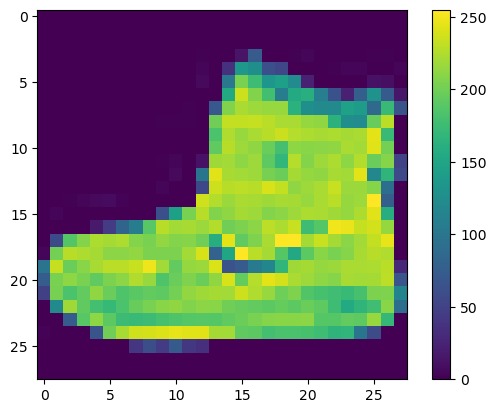

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

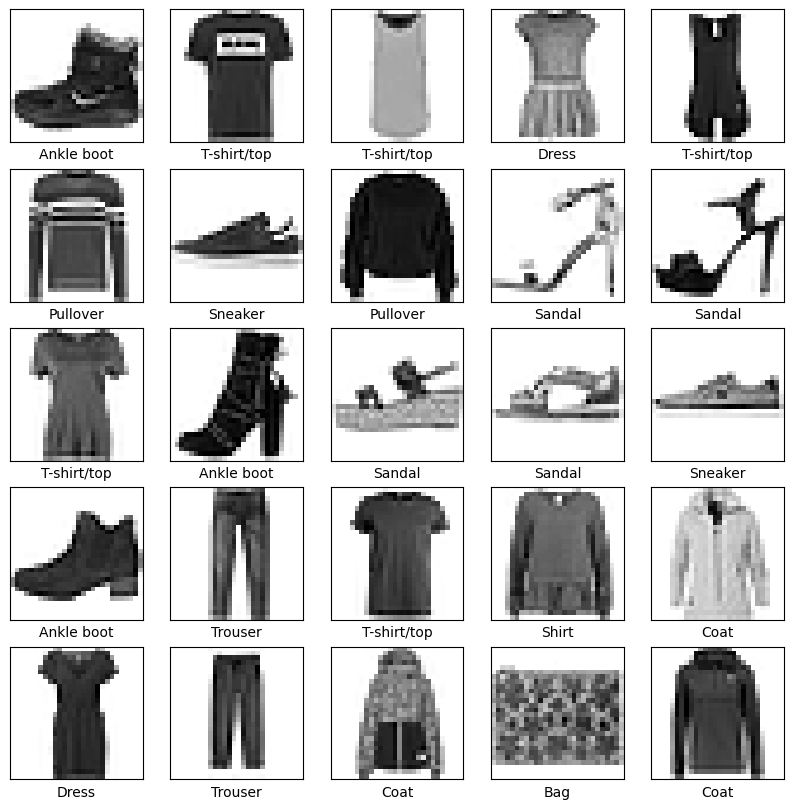

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10)
    
])

In [22]:
model.compile(optimizer = "Adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ["accuracy"]
             )

In [23]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4931 - accuracy: 0.8281
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3746 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3347 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3103 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2934 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2804 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2552 - accuracy: 0.9060
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2457 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.237

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nTest Accuracy:', test_acc)

313/313 - 0s - loss: 0.3293 - accuracy: 0.8845 - 380ms/epoch - 1ms/step

Test Accuracy: 0.8845000267028809


In [25]:
probablity_model = tf.keras.Sequential([model, 
                                       tf.keras.layers.Softmax()])

In [26]:
predictions = probablity_model.predict(test_images)

313/313 [==============================] - 0s 760us/step


In [27]:
predictions[0]

array([2.5941529e-07, 7.6476554e-06, 7.1711878e-07, 2.9565992e-06,
       2.8535231e-08, 3.5411521e-04, 9.0297908e-06, 1.8266919e-01,
       1.3423909e-07, 8.1695592e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [37]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)

In [38]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

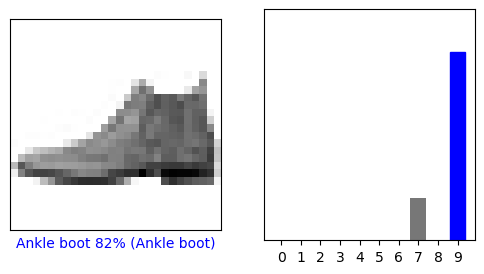

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

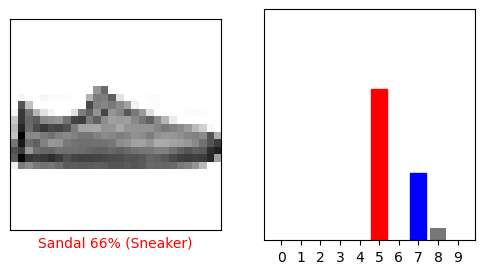

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

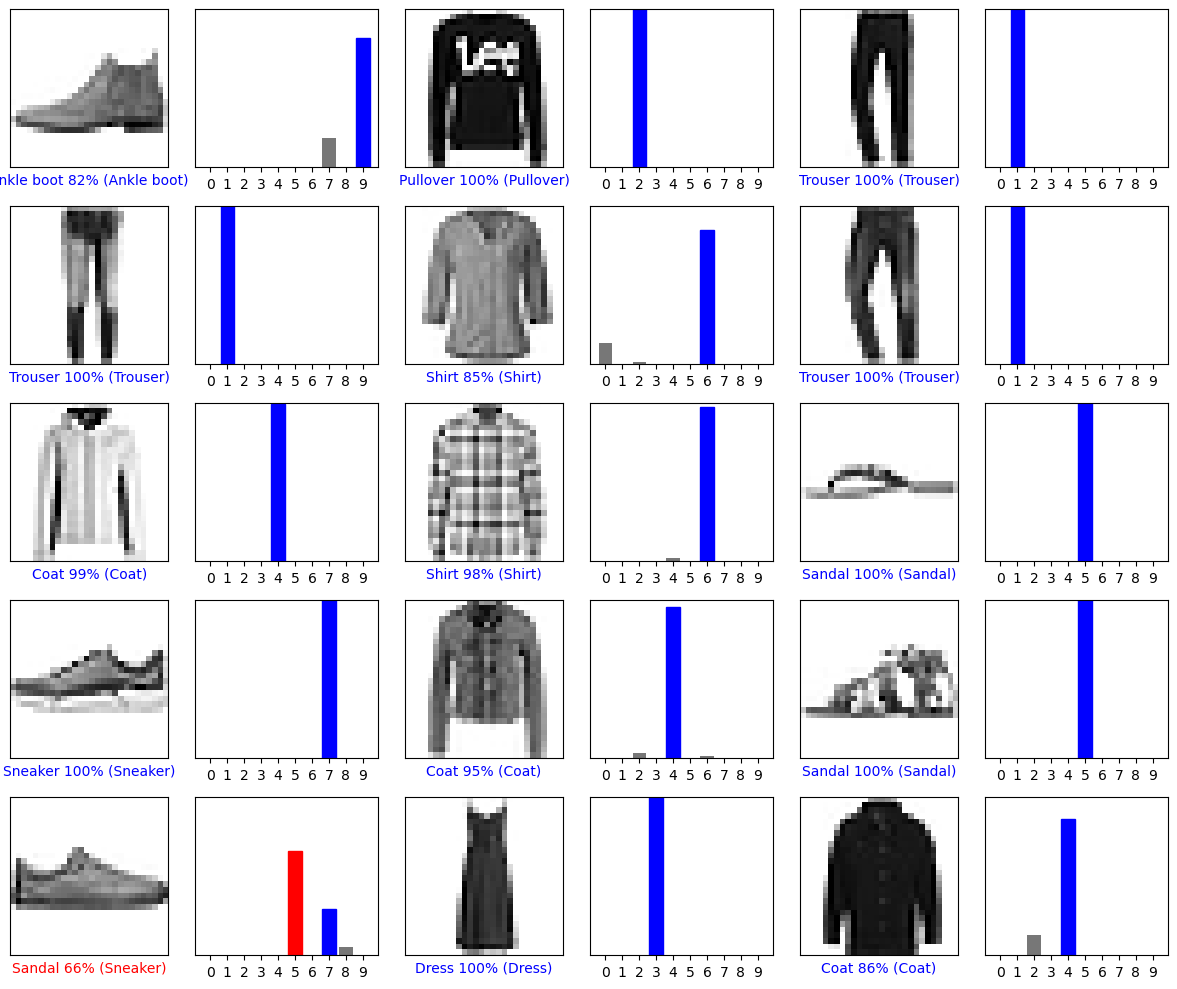

In [41]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [42]:
img = test_images[1]

print(img.shape)

(28, 28)


In [43]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [44]:
predictions_single = probablity_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[1.0324243e-05 1.5638759e-16 9.9943310e-01 6.5608096e-12 5.1153963e-04
  8.7886989e-12 4.5053730e-05 2.3571825e-19 3.3623973e-10 2.1495102e-17]]


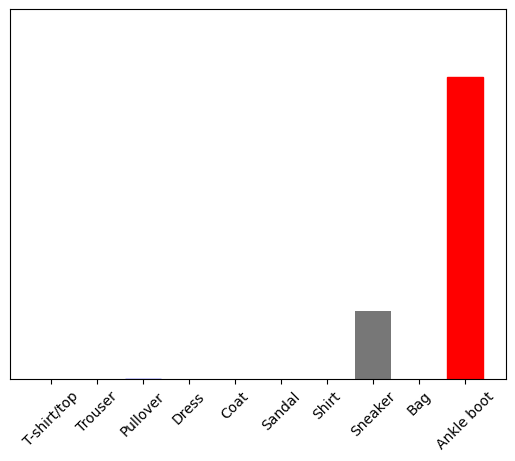

In [46]:
plot_value_array(1, predictions[0], test_labels)
plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [47]:
np.argmax(predictions_single[0])

2